In [17]:
import torch

import torch.nn as nn 

import torch.optim as optim

import matplotlib.pyplot as plt

In [18]:
# A deep network without normalization

class DeepNetwork(nn.Module):

    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(

            nn.Linear(2,32),

            nn.Tanh(),

            nn.Linear(32,32),

            nn.Tanh(),

            nn.Linear(32,32),

            nn.Tanh(),

            nn.Linear(32,1)
        )

    def forward(self,x):

        return self.layers(x)

In [19]:
model = DeepNetwork()

loss_fn = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=1.0) # large lr to provoke explosion

In [20]:
X = torch.randn(10,2)

y = torch.randn(10,1)

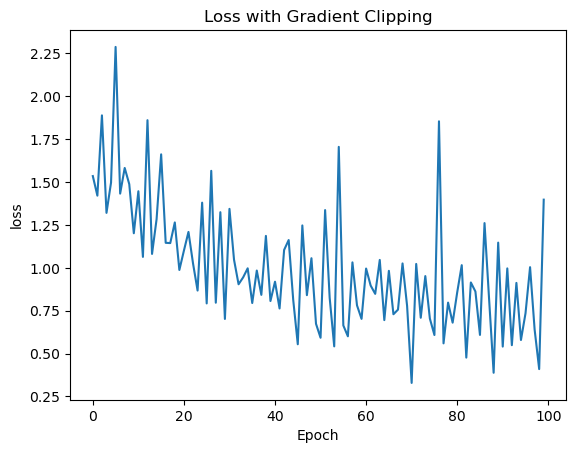

In [21]:
losses = []

for epoch in range(100):

    pred = model(X)

    loss = loss_fn(pred, y)

    optimizer.zero_grad()

    loss.backward()

    # Without this, gradients explode

    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    optimizer.step()

    losses.append(loss.item())


plt.plot(losses)

plt.title('Loss with Gradient Clipping')

plt.xlabel('Epoch')

plt.ylabel('loss')

plt.show()


